In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle

with open('../../assets/credit.pkl', 'rb') as file:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [3]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [4]:
X_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [5]:
import numpy as np

In [6]:
X_credit = np.concatenate((X_credit_train, X_credit_test), axis=0)
X_credit.shape

(2000, 3)

In [7]:
X_credit

array([[-1.3754462 ,  0.50630999,  0.10980934],
       [ 1.45826409, -1.64894017, -1.21501497],
       [-0.79356829,  0.22531104, -0.43370226],
       ...,
       [ 1.37445674, -1.05746369, -1.12564819],
       [-1.57087737, -0.6348826 , -0.36981671],
       [-1.03572293, -0.93978209,  0.04244312]])

In [8]:
y_credit = np.concatenate((y_credit_train, y_credit_test))
y_credit.shape

(2000,)

In [9]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

## Árvore de decisão

In [10]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [11]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'},
 0.983)

## Random forest

In [12]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 40, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [13]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 150},
 0.9865)

## kNN

In [14]:
parameters = {
    "n_neighbors": [3, 5, 10, 20],
    "p": [1, 2]
}

In [15]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'n_neighbors': 20, 'p': 1}, 0.9800000000000001)

## Regressão logística

In [16]:
parameters = {
    "tol": [0.0001, 0.00001, 0.000001],
    "C": [1.0, 1.5, 2.0],
    "solver": ["lbfgs", "sag", "saga"]
}

In [17]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}, 0.9484999999999999)

## SVM

In [18]:
parameters = {
    "tol": [0.001, 0.0001, 0.00001],
    "C": [1.0, 1.5, 2.0],
    "kernel": ["rbf", "linear", "poly", "sigmoid"]
}

In [19]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}, 0.9829999999999999)

## Redes neurais

In [20]:
parameters = {
    'activation': ['relu', 'logistic', 'tahn'],
    'solver': ['adam', 'sgd'],
    'batch_size': [10, 56]
}

In [21]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multi

({'activation': 'relu', 'batch_size': 56, 'solver': 'adam'},
 0.9970000000000001)

## Validação cruzada

In [22]:
from sklearn.model_selection import cross_val_score, KFold

In [23]:
results_tree = []
results_random_forest = []
results_knn = []
results_logistica = []
results_svm = []
results_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    tree = DecisionTreeClassifier(
        criterion="entropy",
        min_samples_leaf=1,
        min_samples_split=5,
        splitter="best"
    )

    scores = cross_val_score(tree, X_credit, y_credit, cv=kfold)
    results_tree.append(scores.mean())

    random_forest = RandomForestClassifier(
        criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    results_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X_credit, y_credit, cv=kfold)
    results_knn.append(scores.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv=kfold)
    results_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    results_svm.append(scores.mean())

    rede_neural = MLPClassifier(
        activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv=kfold)
    results_rede_neural.append(scores.mean())

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multi

In [24]:
import pandas as pd

In [25]:
results = pd.DataFrame({
    'Arvore': results_tree,
    'Random forest': results_random_forest,
    'KNN': results_knn,
    'Logistica': results_logistica,
    'SVM': results_svm,
    'Rede neural': results_rede_neural
})
results

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9865,0.9830,0.9815,0.9475,0.9845,0.9970
1,0.9850,0.9830,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9880,0.9795,0.9470,0.9865,0.9975
3,0.9870,0.9830,0.9780,0.9460,0.9850,0.9970
4,0.9880,0.9850,0.9820,0.9465,0.9850,0.9975
5,0.9885,0.9805,0.9780,0.9465,0.9845,0.9975
6,0.9880,0.9835,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9880,0.9800,0.9480,0.9850,0.9975
8,0.9870,0.9830,0.9795,0.9465,0.9840,0.9965
9,0.9870,0.9840,0.9820,0.9465,0.9845,0.9975


In [26]:
results.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987150,0.983633,0.980050,0.946950,0.985083,0.997150
std,0.001782,0.001898,0.001533,0.000687,0.001280,0.000438
min,0.983000,0.979500,0.977000,0.945500,0.982000,0.996500
25%,0.986125,0.982625,0.979000,0.946500,0.984125,0.997000
50%,0.987000,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.984875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988000,0.982500,0.948500,0.987500,0.998000


In [27]:
(results.std() / results.mean()) * 100

Arvore           0.180505
Random forest    0.192955
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.043971
dtype: float64

# Teste de normalidade nos resultados

In [28]:
alpha = 0.05 # confiabilidade dos testes de 95%

In [29]:
from scipy.stats import shapiro

In [31]:
results_shapiro = shapiro(results_tree), shapiro(results_random_forest), shapiro(results_knn), shapiro(results_logistica), shapiro(results_svm), shapiro(results_rede_neural)
results_shapiro

(ShapiroResult(statistic=0.959934413433075, pvalue=0.30858129262924194),
 ShapiroResult(statistic=0.9575737118721008, pvalue=0.2682036757469177),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.8726087212562561, pvalue=0.0019158455543220043))

In [34]:
for i, result in enumerate(results_shapiro):
    if result.pvalue <= alpha:
        print(f"Os dados '{results.columns[i]}' não segue uma distribuição normal")
        continue
    
    print(f"Os dados '{results.columns[i]}' segue uma distribuição normal")

'Arvore' segue uma distribuição normal
'Random forest' segue uma distribuição normal
'KNN' segue uma distribuição normal
'Logistica' segue uma distribuição normal
'SVM' segue uma distribuição normal
'Rede neural' não segue uma distribuição normal


In [35]:
import seaborn as sns

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn

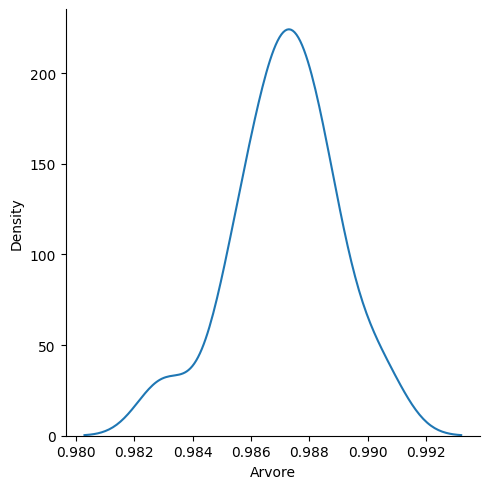

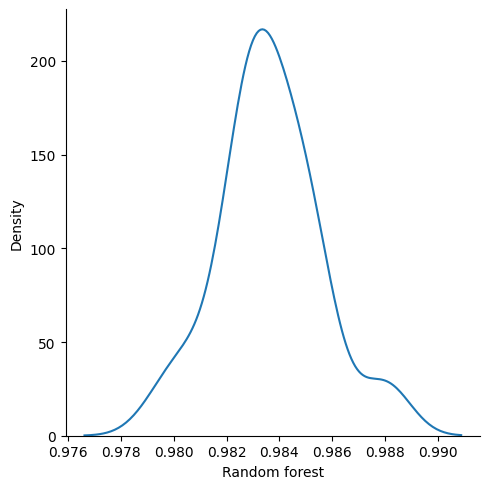

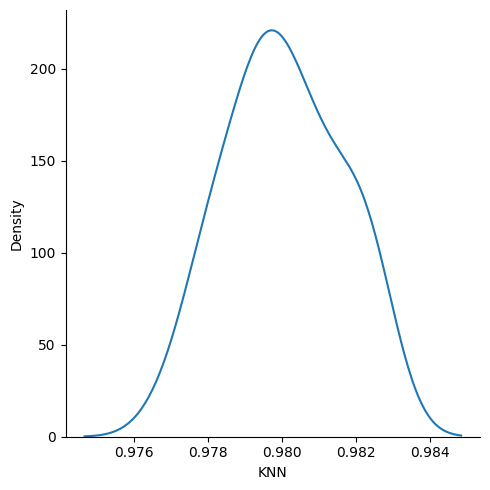

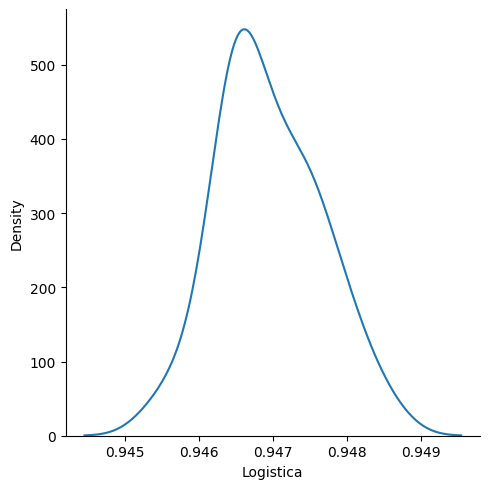

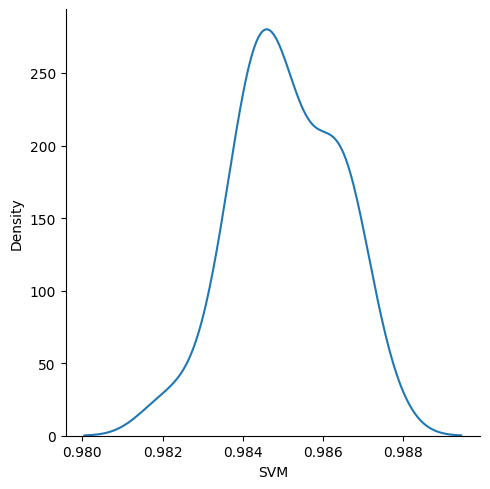

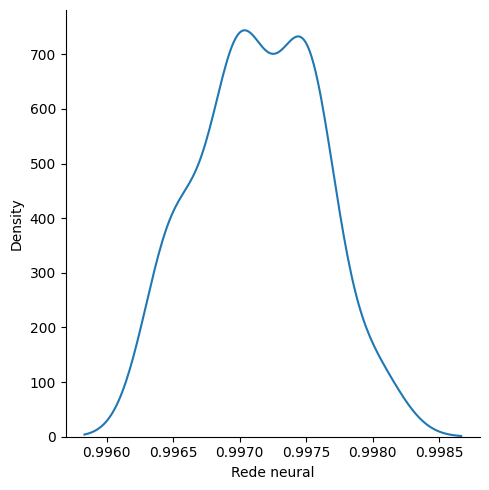

In [39]:
for i in range(len(results.columns)):
    sns.displot(results.iloc[:, i], kind="kde");